# Gradientenabstiegsverfahren

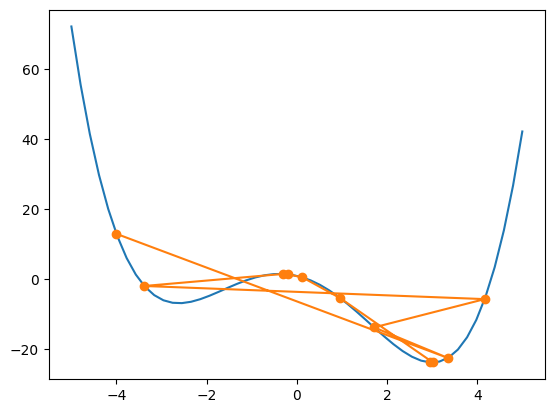

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 0.25*x**4-4*x**2-3*x+1
def df(x):
    return x**3-8*x-3 # Hier muss die Ableitung noch hinzugefügt werden

x = np.linspace(-5,5)
x0 = -4
xlist = [x0]

# -----------------------------------------
# Hier kommt der eigene Code rein!
lr = 0.21
n_epochs = 10

for epoch in range(n_epochs):
    xalt = xlist[-1]
    xneu = xalt-lr*df(xalt)
    xlist.append(xneu)
# xneu = xalt-lr*df(xalt)

# -----------------------------------------

plt.figure()
plt.plot(x,f(x))
plt.plot(xlist, [f(x) for x in xlist], "-o")
plt.show()

##Gradientenabstieg: Bestgerade

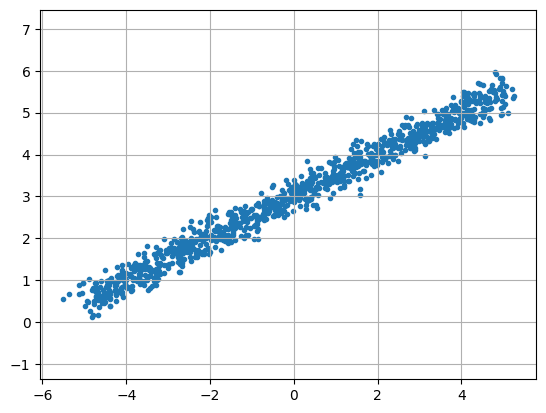

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
xx = np.linspace(-5,5,N)
yy = 0.5*xx+3 # y = m*x+b, m=0.5, b=3
data = (np.stack((xx,yy)).T)
data += 0.2*np.random.randn(N, 2) # Verrausche die Punkte

plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".")
plt.axis("equal")
plt.grid()


0.4962523421763838 3.0713355242585805


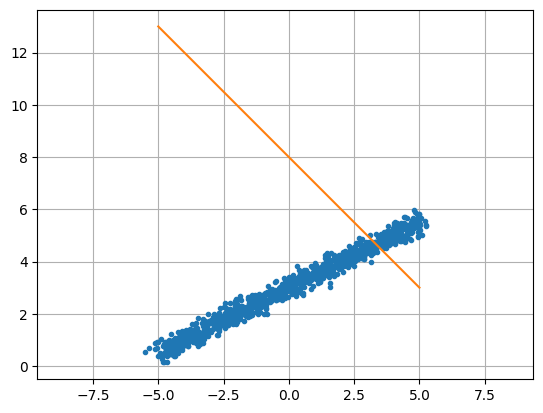

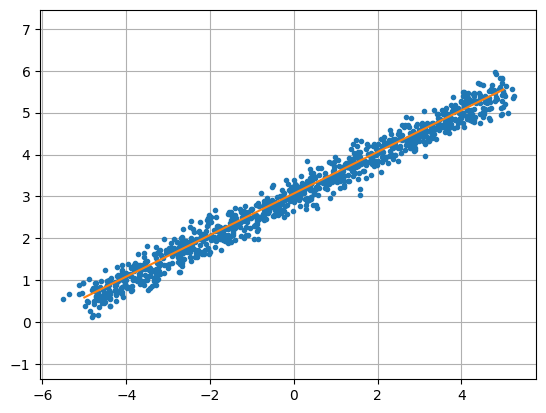

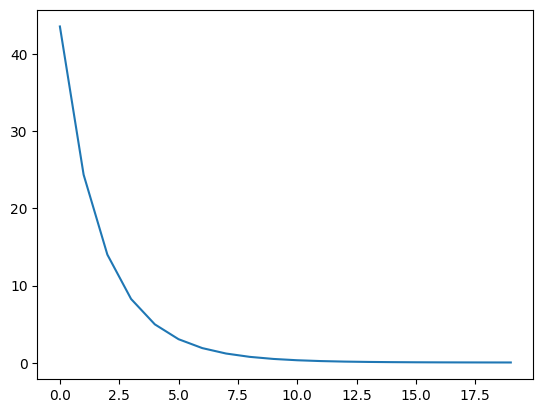

In [ ]:
def lin(x,m,b):
    return x[:,0]*m+b

m = -1
b = 8

plt.figure()
plt.plot(data[:,0], data[:,1], ".")
plt.plot([-5,5], [-5*m+b, 5*m+b])
plt.axis("equal")
plt.grid()

# -----------------------------------------
# Hier kommt der eigene Code rein!
n_epochs = 20
lr = 0.1
lossliste = np.zeros(n_epochs)

for epoch in range(n_epochs):
    out = lin(data, m, b)
    loss = np.mean((out-data[:,1])**2)
    lossliste[epoch] = loss
    d_m = np.mean(2*(out-data[:,1])*data[:,0])
    d_b = np.mean(2*(out-data[:,1])*1)

    m = m-lr*d_m
    b = b-lr*d_b

# -----------------------------------------

print(m, b)
plt.figure()
plt.plot(data[:,0], data[:,1], ".")
plt.plot([-5,5], [-5*m+b, 5*m+b])
plt.axis("equal")
plt.grid()

plt.figure()
plt.plot(lossliste)
plt.show()

## Mona Lisa mit Gradientenabstieg

(48, 32, 3)


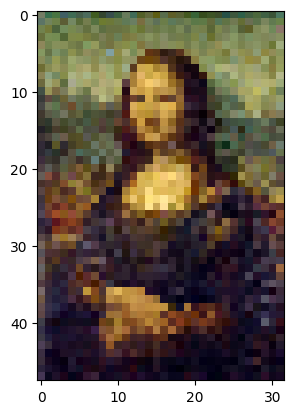

  0%|          | 0/200 [00:00<?, ?it/s]

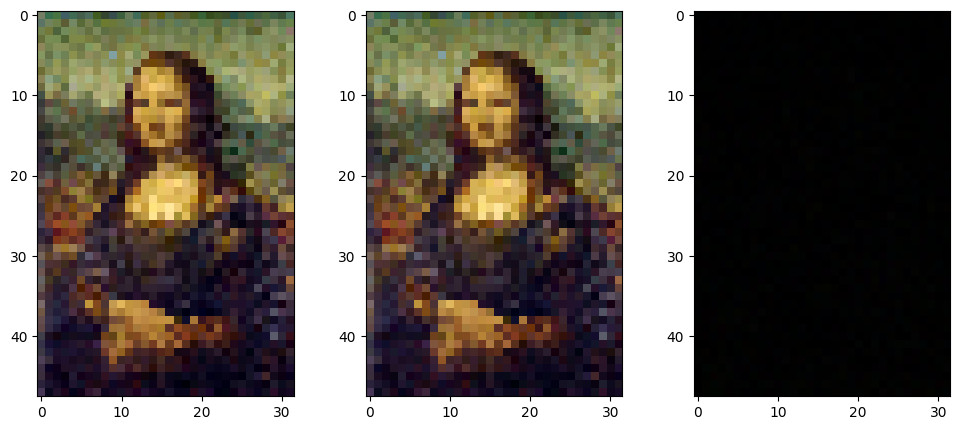

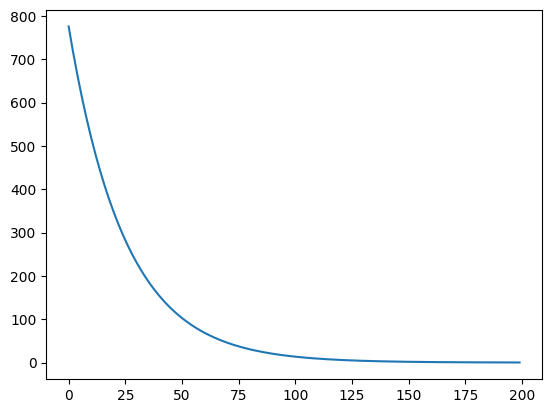

0.2497639485694724


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from tqdm.auto import trange

# Lade und normalisiere Bild
image_url = "https://cdn.pariscityvision.com/library/image/5449.jpg"
target = imread(image_url).astype(float)[::32,::32]
target -= np.min(target)
target /= np.max(target)
print(target.shape)
h, b, c = target.shape

plt.figure()
plt.imshow(target)
plt.show()

# Initialisiere Rauschbild
img = np.random.rand(h, b, c)

# -----------------------------------------
# Hier kommt der eigene Code rein!
n_epochs = 200
lr = 0.01
lossliste = np.zeros(n_epochs)
vid = [img] # Für das GIF hinterher (nicht klausurrelevant)
for epoch in trange(n_epochs):
    loss = np.sum((img-target)**2)
    d_img = 2*(img-target)*1
    img = img-lr*d_img
    lossliste[epoch] = loss
    vid.append(img) # Für das GIF hinterher (nicht klausurrelevant)

# -----------------------------------------

plt.figure(figsize=[12,5])
plt.subplot(1,3,1)
plt.imshow(target)
plt.subplot(1,3,2)
plt.imshow(img)
plt.subplot(1,3,3)
plt.imshow(np.abs(img-target), vmin=0, vmax=1)
plt.show()

plt.figure()
plt.plot(lossliste)
plt.show()
print(lossliste[-1])